# Polo Tech - ADA
# Módulo IV - Machine Learning


### 31/03/23
### Integrantes: Victor Hugo Chagas, Artur Amaral, Leandro Lima

# Predição de Popularidade Musical - Spotify 

![Gato fofo](imagens/FestivalSpotify.jpg)


### Link: https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020

## Qual o motivo desse dataset? Como ele pode ser aplicado ao mercado? 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error


In [4]:
df = pd.read_csv('data.csv')

## 1. Analisar o formato do dataset 

In [5]:
df.shape

(169909, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [7]:
df['popularity'].describe()

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [8]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## 2. Redução do dataset devido a prosposta do trabalho.
Como estamos querendo desenvolver um modelo para empresas que lidam com shows e festivais, é interessante analisar bandas/artistas que possam ainda estar na ativa e o mesmo princípio para o seu público alvo.

In [12]:
df_att = df.loc[df['year'] >= 1970, :]

In [13]:
#Ver o quanto reduziu o df
df_att.shape

(101656, 19)

In [14]:
df_att.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.176474,-0.046748,-0.698513,-0.161296,0.199216,-0.027403,-0.063181,-0.548065,0.075345,-0.103692,-0.098337,-0.153134,-0.204133,-0.143276
danceability,-0.176474,1.000000,-0.112473,0.104001,0.231008,-0.276546,0.028101,-0.139980,0.235774,-0.069890,0.164426,0.193336,-0.122076,0.515564,0.160259
duration_ms,-0.046748,-0.112473,1.000000,-0.003858,-0.049575,0.105978,0.001698,0.059994,-0.063884,-0.060732,-0.085346,-0.039164,-0.038341,-0.145860,-0.114609
energy,-0.698513,0.104001,-0.003858,1.000000,0.119215,-0.199469,0.034020,0.175577,0.747830,-0.067220,0.087105,0.143446,0.201922,0.320899,0.140571
explicit,-0.161296,0.231008,-0.049575,0.119215,1.000000,-0.110003,0.010791,0.033524,0.193889,-0.101521,0.255581,0.466648,-0.017211,-0.054854,0.330890
instrumentalness,0.199216,-0.276546,0.105978,-0.199469,-0.110003,1.000000,-0.014071,-0.026180,-0.399432,-0.033518,-0.102384,-0.105331,-0.071021,-0.217431,-0.082581
key,-0.027403,0.028101,0.001698,0.034020,0.010791,-0.014071,1.000000,-0.005114,0.024740,-0.145729,0.000243,0.029669,0.002687,0.036164,0.006673
liveness,-0.063181,-0.139980,0.059994,0.175577,0.033524,-0.026180,-0.005114,1.000000,0.069619,0.008954,-0.088885,0.138432,0.016856,-0.030721,-0.058841
loudness,-0.548065,0.235774,-0.063884,0.747830,0.193889,-0.399432,0.024740,0.069619,1.000000,-0.042367,0.270392,0.115091,0.164393,0.234166,0.343870
mode,0.075345,-0.069890,-0.060732,-0.067220,-0.101521,-0.033518,-0.145729,0.008954,-0.042367,1.000000,-0.067510,-0.094163,0.018328,0.006406,-0.071951


In [15]:
# sns.pairplot(df_att2)
# plt.show()
# Demora pra carregar

In [16]:
#'Dropando' colunas  
df_att2 = df_att.drop(columns=['acousticness', 'id','mode', 'release_date'], axis=1)

In [17]:
df_att2

,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
3054,['Elton John'],0.436,380667,0.429,0,0.000103,3,0.1040,-10.884,My Father's Gun,29,0.0319,119.025,0.223,1970
3055,['Three Dog Night'],0.629,166707,0.376,0,0.000000,7,0.2350,-13.934,It Ain't Easy,26,0.0337,76.848,0.347,1970
3056,['Martha Reeves & The Vandellas'],0.417,176573,0.753,0,0.000000,9,0.2690,-10.204,I Should Be Proud,33,0.1260,178.408,0.794,1970
3057,['Vashti Bunyan'],0.600,141893,0.107,0,0.011400,0,0.1010,-19.189,Where I Like To Stand,26,0.0525,117.630,0.732,1970
3058,['Ry Cooder'],0.568,134067,0.434,0,0.626000,7,0.2290,-14.170,Available Space,35,0.0379,147.388,0.694,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,"['DripReport', 'Tyga']",0.875,163800,0.443,1,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.306,2020
169905,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.270,2020
169906,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,0.002330,7,0.1080,-9.332,How Would I Know,70,0.1050,123.700,0.153,2020
169907,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,0.000000,1,0.2220,-2.557,I Found You,70,0.0385,129.916,0.472,2020


## 3. Implementação dos Modelos 

### 3.1.1 Regressão Linear 

In [18]:
X = df_att2.drop(columns=['popularity','artists', 'name'],  axis=1)
y = df_att2['popularity']

In [19]:
# Separação dos dodos 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [21]:
regressao = LinearRegression()
regressao.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regressao.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 score: {r2:.2f}")
print(f"MSE: {mse:.2f}")

# Sem utilizar o normalize
# R2 score: 0.46
# MSE: 99.27

# Com train_size=0.8
# R2 score: 0.47
# MSE: 99.26

R2 score: 0.47
MSE: 99.26


In [23]:
# Pior ainda =x com 
# regressao = LinearRegression(fit_intercept=False, normalize=True)

### 3.1.2 Regressão Linear - Popularidade Modificada 

In [24]:
def to_binario(popularity):
    if popularity >= 50:
        return 0
    else:
        return 1

df_att2['popularity_binary'] = df_att2['popularity'].apply(to_binario)
df_att3 = df_att2.drop(columns=['popularity'], axis=1)

In [25]:
df_att2 = df_att2.drop(columns=['popularity_binary'], axis=1)

In [26]:
df_att2.head()

,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
3054,['Elton John'],0.436,380667,0.429,0,0.000103,3,0.104,-10.884,My Father's Gun,29,0.0319,119.025,0.223,1970
3055,['Three Dog Night'],0.629,166707,0.376,0,0.000000,7,0.235,-13.934,It Ain't Easy,26,0.0337,76.848,0.347,1970
3056,['Martha Reeves & The Vandellas'],0.417,176573,0.753,0,0.000000,9,0.269,-10.204,I Should Be Proud,33,0.1260,178.408,0.794,1970
3057,['Vashti Bunyan'],0.600,141893,0.107,0,0.011400,0,0.101,-19.189,Where I Like To Stand,26,0.0525,117.630,0.732,1970
3058,['Ry Cooder'],0.568,134067,0.434,0,0.626000,7,0.229,-14.170,Available Space,35,0.0379,147.388,0.694,1970


In [27]:
df_att3

,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,speechiness,tempo,valence,year,popularity_binary
3054,['Elton John'],0.436,380667,0.429,0,0.000103,3,0.1040,-10.884,My Father's Gun,0.0319,119.025,0.223,1970,1
3055,['Three Dog Night'],0.629,166707,0.376,0,0.000000,7,0.2350,-13.934,It Ain't Easy,0.0337,76.848,0.347,1970,1
3056,['Martha Reeves & The Vandellas'],0.417,176573,0.753,0,0.000000,9,0.2690,-10.204,I Should Be Proud,0.1260,178.408,0.794,1970,1
3057,['Vashti Bunyan'],0.600,141893,0.107,0,0.011400,0,0.1010,-19.189,Where I Like To Stand,0.0525,117.630,0.732,1970,1
3058,['Ry Cooder'],0.568,134067,0.434,0,0.626000,7,0.2290,-14.170,Available Space,0.0379,147.388,0.694,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,"['DripReport', 'Tyga']",0.875,163800,0.443,1,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,0.1430,100.012,0.306,2020,0
169905,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),0.0403,128.000,0.270,2020,0
169906,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,0.002330,7,0.1080,-9.332,How Would I Know,0.1050,123.700,0.153,2020,0
169907,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,0.000000,1,0.2220,-2.557,I Found You,0.0385,129.916,0.472,2020,0


#### Sobre os df

df: Inicial;

df_att: sem reduções de colunas; 

df_att2: com reduções de colunas, popularidade de 100-1;

df_att3: popularidade 0 ou 1.

In [28]:
X2 = df_att3.drop(columns=['popularity_binary','artists', 'name'],  axis=1)
y2 = df_att3['popularity_binary']

In [29]:
# Separação dos dodos 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.75, random_state=42)

regressao_2 = LinearRegression()
regressao_2.fit(X2_train, y2_train)

LinearRegression()

In [30]:
y2_pred = regressao_2.predict(X2_test)
r2_2 = r2_score(y2_test, y2_pred)
mse_2 = mean_squared_error(y2_test, y2_pred)

print(f"R2 score: {r2_2:.2f}")
print(f"MSE: {mse_2:.2f}")

# Com normalize=True 


#sem ele 
# R2 score: 0.31
# MSE: 0.16

R2 score: 0.31
MSE: 0.16


### OBS.: A regressão linear não é um bom caminho para o problema!


### 3.2.1 Árvore de Decisão

In [31]:
from sklearn.tree import DecisionTreeRegressor
#Separar os dados 
X3 = df_att2.drop(columns=['popularity','artists', 'name'],  axis=1)
y3 = df_att2['popularity']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.35, random_state=42)

In [32]:
dt = DecisionTreeRegressor() 
#Modelo da árvore

In [33]:
dt.fit(X3_train, y3_train)
#Treinamento

DecisionTreeRegressor()

In [34]:
y3_pred = dt.predict(X3_test)

print('R2 score:', r2_score(y3_test, y3_pred))
print('MSE:', mean_squared_error(y3_test, y3_pred))

R2 score: 0.03226747863660684
MSE: 178.9239329601524


### Muito abaixo do esperado!

### 3.2.2 Árvore de Decisão - Popularidade Binária 

In [35]:
X4 = df_att3.drop(columns=['popularity_binary','artists', 'name'], axis=1)
y4 = df_att3['popularity_binary']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.35, random_state=42)

In [36]:
dt2 = DecisionTreeRegressor()
dt2.fit(X4_train, y4_train)
#Treinamento

DecisionTreeRegressor()

In [37]:
y4_pred = dt.predict(X4_test)

print('R2 score:', r2_score(y4_test, y4_pred))
print('MSE:', mean_squared_error(y4_test, y4_pred))

R2 score: -9549.122410578086
MSE: 2215.3804019502218


### :'(

### 3.3 Regressão Logística 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X5 = df_att3.drop(columns=['popularity_binary','artists', 'name'],  axis=1)
y5 = df_att3['popularity_binary']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.35, random_state=42)
# Para stratify = y5 a acurácia deu menor. 

In [39]:
df_att3["popularity_binary"].value_counts(normalize=True)

1    0.633893
0    0.366107
Name: popularity_binary, dtype: float64

<AxesSubplot:xlabel='popularity_binary', ylabel='count'>

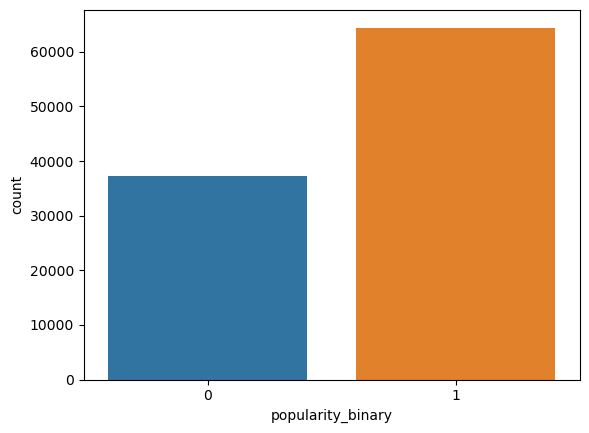

In [40]:
sns.countplot(data=df_att3, x="popularity_binary")

In [41]:
# Fazendo o escolanemento 
scaler = StandardScaler()
X5_train_scaled = scaler.fit_transform(X5_train)
X5_test_scaled = scaler.transform(X5_test)

In [42]:
reg_log = LogisticRegression()

In [43]:
reg_log.fit(X5_train_scaled, y5_train)

LogisticRegression()

In [44]:
# Fazer previsões
y5_pred = reg_log.predict(X5_test_scaled)

# Avaliar o modelo
accuracy = accuracy_score(y5_test, y5_pred)
conf_matrix = confusion_matrix(y5_test, y5_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:\n', conf_matrix)

# Para stratify = y5
# Accuracy: 0.7798482293423271
# Confusion matrix:
#  [[ 8664  4362]
#  [ 3471 19083]]

Accuracy: 0.7816469926925239
Confusion matrix:
 [[ 8660  4353]
 [ 3416 19151]]


### 3.3.1 Tunning dos Hiperparâmetros

In [46]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#Nosso dicionário de hip.

In [47]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=reg_log, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X5_train_scaled, y5_train)


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [48]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)


Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.7846418070392897


In [49]:

X52 = df_att3.drop(columns=['popularity_binary','artists', 'name'],  axis=1)
y52= df_att3['popularity_binary']

X52_train, X52_test, y52_train, y52_test = train_test_split(X52, y52, test_size=0.35, random_state=42)

In [50]:
# Fazendo o escolanemento 
scaler52 = StandardScaler()
X52_train_scaled = scaler52.fit_transform(X52_train)
X52_test_scaled = scaler52.transform(X52_test)

In [52]:
reg_log2 = LogisticRegression(C=0.001, penalty='l1', solver= 'saga')

In [53]:
reg_log2.fit(X52_train_scaled, y52_train)

LogisticRegression(C=0.001, penalty='l1', solver='saga')

In [54]:
y52_pred = reg_log2.predict(X52_test_scaled)

# Avaliar o modelo
accuracy52 = accuracy_score(y52_test, y52_pred)
conf_matrix52 = confusion_matrix(y52_test, y52_pred)

print('Accuracy:', accuracy52)
print('Confusion matrix: \n', conf_matrix52)

Accuracy: 0.7823777403035413
Confusion matrix:
 [[ 8566  4447]
 [ 3296 19271]]



## Esse modelo (Regressão Logística) atende ao problema proposto. 

### 3.4 Kneighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [57]:
X6 = df_att3.drop(columns=['popularity_binary','artists', 'name'],  axis=1)
y6 = df_att3['popularity_binary']

In [58]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,  y6, test_size=0.3, random_state=42, stratify=y6)

In [59]:
scaler6 = StandardScaler()
X6_train_scaled = scaler6.fit_transform(X6_train)
X6_test_scaled = scaler6.transform(X6_test)

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X6_train_scaled, y6_train)

KNeighborsClassifier()

In [62]:
y6_pred = knn.predict(X6_test_scaled)

C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
acuracia = accuracy_score(y6_test, y6_pred)
print("Acurácia:", acuracia)

Acurácia: 0.7551562448765452


In [64]:
from sklearn.metrics import classification_report

print(classification_report(y6_test, y6_pred))


              precision    recall  f1-score   support

           0       0.69      0.61      0.64     11165
           1       0.79      0.84      0.81     19332

    accuracy                           0.76     30497
   macro avg       0.74      0.72      0.73     30497
weighted avg       0.75      0.76      0.75     30497



### 3.4.1 Tunning de Hiperparâmetros - Tentativa e Erro

In [ ]:

# n_neighbors = 10
# Ac.: 0.7620
  
# n_neighbors = 50
# Ac.: 0.7794
    
# n_neighbors = 100
# Ac.: 0.7774
        
# n_neighbors = 500
# Ac.: 0.7774

C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

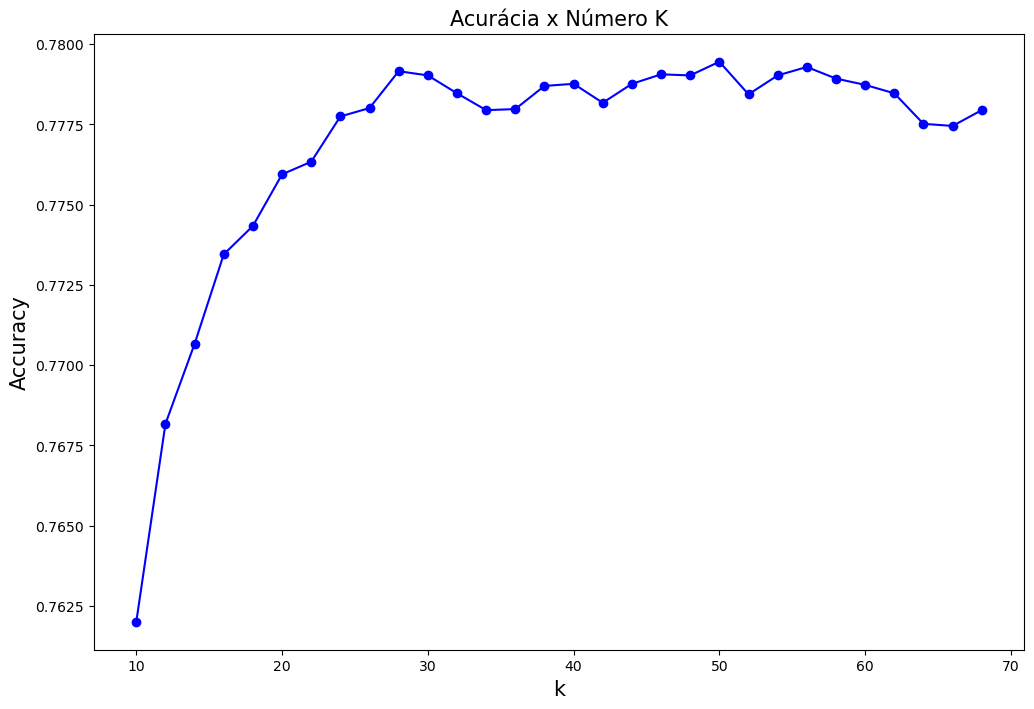

Melhor k: 21


In [215]:
ks = []
accuracys = []
for k in range(10, 70, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X6_train_scaled, y6_train)
    y6_pred = model.predict(X6_test_scaled)
    acc = accuracy_score(y6_test, y6_pred)
    accuracys.append(acc)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, accuracys, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Acurácia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracys)+1
print('Melhor k:', best_k)

### 3.4.2 Tunning de Hiperparâmetros GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid62 = {
                "weights" : ["distance", "uniform"],
                "metric" : ["manhattan", "euclidean", "minkowski"],
                "n_neighbors" : range(20, 22)
                }

In [87]:
grid_search62 = GridSearchCV(KNeighborsClassifier(), param_grid62, cv=3,verbose=10)


In [88]:
#Treinamento com o grid. 
grid_search62.fit(X6_train_scaled, y6_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START metric=manhattan, n_neighbors=20, weights=distance.........
[CV 1/3; 1/12] END metric=manhattan, n_neighbors=20, weights=distance;, score=0.775 total time=  19.1s
[CV 2/3; 1/12] START metric=manhattan, n_neighbors=20, weights=distance.........
[CV 2/3; 1/12] END metric=manhattan, n_neighbors=20, weights=distance;, score=0.783 total time=  20.3s
[CV 3/3; 1/12] START metric=manhattan, n_neighbors=20, weights=distance.........
[CV 3/3; 1/12] END metric=manhattan, n_neighbors=20, weights=distance;, score=0.778 total time=  20.5s
[CV 1/3; 2/12] START metric=manhattan, n_neighbors=20, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/3; 2/12] END metric=manhattan, n_neighbors=20, weights=uniform;, score=0.776 total time=  19.9s
[CV 2/3; 2/12] START metric=manhattan, n_neighbors=20, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/3; 2/12] END metric=manhattan, n_neighbors=20, weights=uniform;, score=0.782 total time=  20.8s
[CV 3/3; 2/12] START metric=manhattan, n_neighbors=20, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/3; 2/12] END metric=manhattan, n_neighbors=20, weights=uniform;, score=0.776 total time=  21.3s
[CV 1/3; 3/12] START metric=manhattan, n_neighbors=21, weights=distance.........
[CV 1/3; 3/12] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.776 total time=  20.3s
[CV 2/3; 3/12] START metric=manhattan, n_neighbors=21, weights=distance.........
[CV 2/3; 3/12] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.784 total time=  21.4s
[CV 3/3; 3/12] START metric=manhattan, n_neighbors=21, weights=distance.........
[CV 3/3; 3/12] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.778 total time=  19.5s
[CV 1/3; 4/12] START metric=manhattan, n_neighbors=21, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/3; 4/12] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.778 total time=  24.1s
[CV 2/3; 4/12] START metric=manhattan, n_neighbors=21, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/3; 4/12] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.785 total time=  23.0s
[CV 3/3; 4/12] START metric=manhattan, n_neighbors=21, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/3; 4/12] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.779 total time=  21.5s
[CV 1/3; 5/12] START metric=euclidean, n_neighbors=20, weights=distance.........
[CV 1/3; 5/12] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.774 total time=  14.1s
[CV 2/3; 5/12] START metric=euclidean, n_neighbors=20, weights=distance.........
[CV 2/3; 5/12] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.781 total time=  12.5s
[CV 3/3; 5/12] START metric=euclidean, n_neighbors=20, weights=distance.........
[CV 3/3; 5/12] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.775 total time=  14.1s
[CV 1/3; 6/12] START metric=euclidean, n_neighbors=20, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/3; 6/12] END metric=euclidean, n_neighbors=20, weights=uniform;, score=0.774 total time=  14.5s
[CV 2/3; 6/12] START metric=euclidean, n_neighbors=20, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/3; 6/12] END metric=euclidean, n_neighbors=20, weights=uniform;, score=0.780 total time=  14.7s
[CV 3/3; 6/12] START metric=euclidean, n_neighbors=20, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/3; 6/12] END metric=euclidean, n_neighbors=20, weights=uniform;, score=0.775 total time=  13.7s
[CV 1/3; 7/12] START metric=euclidean, n_neighbors=21, weights=distance.........
[CV 1/3; 7/12] END metric=euclidean, n_neighbors=21, weights=distance;, score=0.776 total time=  14.2s
[CV 2/3; 7/12] START metric=euclidean, n_neighbors=21, weights=distance.........
[CV 2/3; 7/12] END metric=euclidean, n_neighbors=21, weights=distance;, score=0.781 total time=  13.9s
[CV 3/3; 7/12] START metric=euclidean, n_neighbors=21, weights=distance.........
[CV 3/3; 7/12] END metric=euclidean, n_neighbors=21, weights=distance;, score=0.775 total time=  14.2s
[CV 1/3; 8/12] START metric=euclidean, n_neighbors=21, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/3; 8/12] END metric=euclidean, n_neighbors=21, weights=uniform;, score=0.778 total time=  13.6s
[CV 2/3; 8/12] START metric=euclidean, n_neighbors=21, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/3; 8/12] END metric=euclidean, n_neighbors=21, weights=uniform;, score=0.782 total time=  14.6s
[CV 3/3; 8/12] START metric=euclidean, n_neighbors=21, weights=uniform..........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/3; 8/12] END metric=euclidean, n_neighbors=21, weights=uniform;, score=0.776 total time=  14.9s
[CV 1/3; 9/12] START metric=minkowski, n_neighbors=20, weights=distance.........
[CV 1/3; 9/12] END metric=minkowski, n_neighbors=20, weights=distance;, score=0.774 total time=  16.0s
[CV 2/3; 9/12] START metric=minkowski, n_neighbors=20, weights=distance.........
[CV 2/3; 9/12] END metric=minkowski, n_neighbors=20, weights=distance;, score=0.781 total time=  13.5s
[CV 3/3; 9/12] START metric=minkowski, n_neighbors=20, weights=distance.........
[CV 3/3; 9/12] END metric=minkowski, n_neighbors=20, weights=distance;, score=0.775 total time=  13.6s
[CV 1/3; 10/12] START metric=minkowski, n_neighbors=20, weights=uniform.........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/3; 10/12] END metric=minkowski, n_neighbors=20, weights=uniform;, score=0.774 total time=  14.1s
[CV 2/3; 10/12] START metric=minkowski, n_neighbors=20, weights=uniform.........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/3; 10/12] END metric=minkowski, n_neighbors=20, weights=uniform;, score=0.780 total time=  16.2s
[CV 3/3; 10/12] START metric=minkowski, n_neighbors=20, weights=uniform.........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/3; 10/12] END metric=minkowski, n_neighbors=20, weights=uniform;, score=0.775 total time=  13.7s
[CV 1/3; 11/12] START metric=minkowski, n_neighbors=21, weights=distance........
[CV 1/3; 11/12] END metric=minkowski, n_neighbors=21, weights=distance;, score=0.776 total time=  13.5s
[CV 2/3; 11/12] START metric=minkowski, n_neighbors=21, weights=distance........
[CV 2/3; 11/12] END metric=minkowski, n_neighbors=21, weights=distance;, score=0.781 total time=  13.8s
[CV 3/3; 11/12] START metric=minkowski, n_neighbors=21, weights=distance........
[CV 3/3; 11/12] END metric=minkowski, n_neighbors=21, weights=distance;, score=0.775 total time=  13.7s
[CV 1/3; 12/12] START metric=minkowski, n_neighbors=21, weights=uniform.........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/3; 12/12] END metric=minkowski, n_neighbors=21, weights=uniform;, score=0.778 total time=  14.0s
[CV 2/3; 12/12] START metric=minkowski, n_neighbors=21, weights=uniform.........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/3; 12/12] END metric=minkowski, n_neighbors=21, weights=uniform;, score=0.782 total time=  13.9s
[CV 3/3; 12/12] START metric=minkowski, n_neighbors=21, weights=uniform.........


C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/3; 12/12] END metric=minkowski, n_neighbors=21, weights=uniform;, score=0.776 total time=  14.3s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': range(20, 22),
                         'weights': ['distance', 'uniform']},
             verbose=10)

In [90]:
# Obter o melhor modelo encontrado pelo GridSearchCV
best_model = grid_search62.best_estimator_


y62_pred = best_model.predict(X6_test_scaled)


accuracy62 = accuracy_score(y6_test, y62_pred)
print(best_model)
print('Accuracy:', accuracy62)

C:\Users\vhcha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier(metric='manhattan', n_neighbors=21)
Accuracy: 0.7768632980293143



## Esse modelo (KNN) também atende ao problema proposto. 

## 4. É possível colocar em produção? 

Sim, como comentado na apresentação. E Por se tratar de uma proposta que tem um cunho subjetivo e como explicado.
Pode vir a ser interessante a empresa ter um modelo que com 75% de acurácia aproximadamente.

## 5. Possíveis melhorias:
 • Aplicar outros métodos de otimização de hiperparâmetros;
 
 • Subdividir em mais categorias, ex.: Muito popular, popular, neutro, não popular;
 
 • Procurar outros datasets que envolvam os gêneros musicais, para assim oferecer a festivais ninchados como: Hellfest (Rock/Metal), Glastronbury (Pop/Rock/Indie), Tomorrowland(eletrônica), 
Festival International De Jazz De Montreal